In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.models import Model


In [9]:
BASE_DIR='Downloads/cityscapes_data'
IMG_HEIGHT, IMG_WIDTH = 128,128

NUM_CLASSES=13


In [16]:
def load_data(path):
    X,Y=[],[]
    bins=np.arange(20,260,20)
    for f in glob.glob(path+"/*.jpg"):
        img=Image.open(f)
        X.append(np.array(img.crop((0,0,256,256)).convert('RGB').resize((IMG_WIDTH,IMG_HEIGHT))))
        msk=img.crop((256,0,512,256)).convert('L').resize((IMG_WIDTH,IMG_HEIGHT))
        Y.append(np.digitize(np.array(msk),bins))
    return np.array(X,np.float32)/255.0,np.array(Y,np.int32)

In [23]:
def build_fcn(shape, classes):
    x=inputs=Input(shape)
    x=Conv2D(32,3,activation='relu', padding='same')(x)
    x=MaxPooling2D()(x)
    x=Conv2D(64,3,activation='relu', padding='same')(x)
    x=MaxPooling2D()(x)
    x=Conv2D(128,3,activation='relu', padding='same')(x)
    x=Conv2DTranspose(64,2,strides=2,padding='same')(x)
    x=Conv2DTranspose(256,2,strides=2, padding='same')(x)
    outputs=Conv2D(classes,1, activation='softmax')(x)
    return Model(inputs,outputs)

X_train,y_train=load_data(BASE_DIR+"/train")
X_val, y_val = load_data(BASE_DIR+"/val")

In [24]:
model = build_fcn((IMG_HEIGHT,IMG_WIDTH,3),NUM_CLASSES)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=8,epochs=2,validation_data=(X_val,y_val))

Epoch 1/2
372/372 [==============================] - 201s 538ms/step - loss: 1.5110 - accuracy: 0.4873 - val_loss: 1.2735 - val_accuracy: 0.6077
Epoch 2/2
372/372 [==============================] - 206s 553ms/step - loss: 1.1912 - accuracy: 0.6341 - val_loss: 1.1395 - val_accuracy: 0.6526


In [25]:
i=np.random.randint(len(X_val))
pred=np.argmax(model.predict(X_val[i:i+1]),-1)[0]
               

1/1 [==============================] - 0s 101ms/step


In [26]:
def show(title,img,cmap=None):
    plt.imshow(img,cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

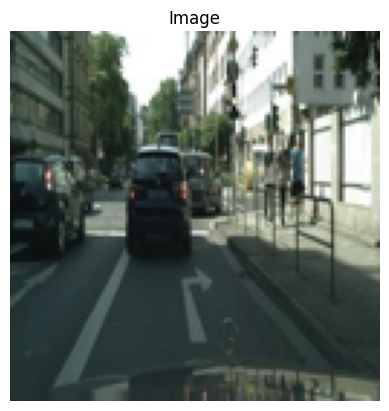

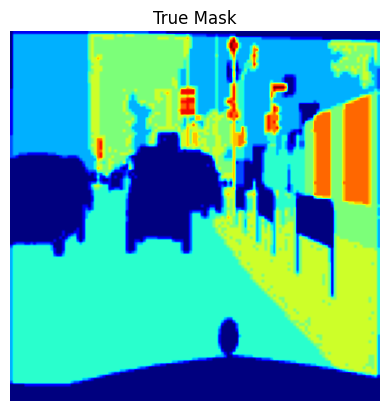

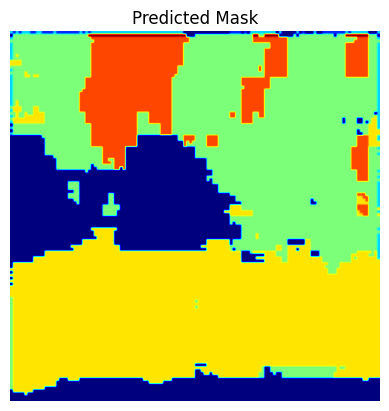

In [27]:
show("Image",X_val[i])
show("True Mask", y_val[i], cmap='jet')
show("Predicted Mask", pred, cmap='jet')